# Arulin Vs. Novadra: Clinical Trial Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gather

In [2]:
patients = pd.read_csv("patients.csv")
treatments = pd.concat([pd.read_csv("treatments.csv"), pd.read_csv("treatments_cut.csv")])
reactions = pd.read_csv("adverse_reactions.csv")


## Assess

In [3]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [4]:
patients.dtypes

patient_id        int64
assigned_sex     object
given_name       object
surname          object
address          object
city             object
state            object
zip_code        float64
country          object
contact          object
birthdate        object
weight          float64
height            int64
bmi             float64
dtype: object

In [5]:
patients.isnull().sum()

patient_id       0
assigned_sex     0
given_name       0
surname          0
address         12
city            12
state           12
zip_code        12
country         12
contact         12
birthdate        0
weight           0
height           0
bmi              0
dtype: int64

In [6]:
patients.dropna(subset=["contact"]).duplicated(subset=["contact"]).sum()

8

In [7]:
mask = patients.duplicated(subset=["contact"], keep=False)
patients[mask].dropna(subset=["contact"])

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962.0,United States,304-438-2648SandraCTaylor@dayrep.com,10/23/1960,206.1,64,35.4
215,216,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
277,278,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [8]:
patients["assigned_sex"].value_counts()

male      253
female    250
Name: assigned_sex, dtype: int64

In [9]:
w_temp = patients["weight"] * 0.453592
w_temp.describe()

count    503.000000
mean      78.668724
std       15.384363
min       22.135290
25%       67.721286
50%       79.514678
75%       90.491604
max      116.074193
Name: weight, dtype: float64

In [10]:
mask = w_temp < 50
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
48,49,female,Annika,Vaara,4853 University Drive,Lombard,IL,60148.0,United States,AnnikaVaara@rhyta.com312-719-7238,2/20/1996,109.1,67,17.1
51,52,female,Noe,Aranda,3977 Jail Drive,Davenport,Illinois,52801.0,United States,NoeArandaGranado@dayrep.com1 309 912 9553,8/7/1938,107.1,63,19.0
74,75,female,Hanka,Gegič,192 Patton Lane,Tulsa,OK,74106.0,United States,918-975-7594HankaGegic@fleckens.hu,1/20/1926,103.2,61,19.5
141,142,female,Evelyn,Uspenskaya,944 Thrash Trail,Dallas,TX,75207.0,United States,903-644-2098EvelynUspenskaya@rhyta.com,10/25/1934,110.2,61,20.8
171,172,female,Blagica,Klobučar,3920 Braxton Street,La Grange,IL,60525.0,United States,815-533-7692BlagicaKlobucar@einrot.com,11/6/1921,106.5,59,21.5
198,199,female,Eufrosina,Schiavone,1984 Counts Lane,Lexington,KY,40507.0,United States,EufrosinaSchiavone@cuvox.de+1 (859) 977-9462,4/6/1926,108.5,62,19.8
210,211,female,Camilla,Zaitseva,4689 Briarhill Lane,Wooster,OH,44691.0,United States,330-202-2145CamillaZaitseva@superrito.com,11/26/1938,48.8,63,19.1
270,271,female,Jowita,Wiśniewska,2168 Butternut Lane,Granite City,Illinois,62040.0,United States,JowitaWisniewska@armyspy.com+1 (618) 512-3319,11/8/1934,108.1,61,20.4
317,318,female,Nancy,Parker,4605 Hall Street,Las Vegas,NV,89110.0,United States,NancyJParker@gustr.com+1 (702) 438-5138,3/21/1945,106.0,63,18.8
335,336,female,Lixue,Hsueh,1540 Overlook Drive,Crawfordsville,IN,47933.0,United States,765-359-0147LixueHsueh@dayrep.com,3/29/1925,102.7,59,20.7


In [11]:
h_temp = patients["height"] * 0.0254
h_temp.describe()

count    503.000000
mean       1.692509
std        0.112047
min        0.685800
25%        1.600200
50%        1.701800
75%        1.778000
max        2.006600
Name: height, dtype: float64

In [12]:
mask = h_temp < 1.2
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [13]:
bmi_calc = np.round(w_temp / h_temp ** 2, 1)
mask = bmi_calc != patients["bmi"]
patients[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
10,11,female,Sandy,Gunnarsson,87 Wood Duck Drive,Rudyard,MI,49780.0,United States,906-478-8949SandyGunnarsson@dayrep.com,7/16/1974,199.3,62,36.4
37,38,female,Albinca,Komavec,1257 Elsie Drive,Huron,SD,57350.0,United States,AlbincaKomavec@rhyta.com+1 (605) 204-6572,6/5/1986,189.9,66,30.6
43,44,female,Zizi,Schmitt,669 Archwood Avenue,Mountain View,WY,82939.0,United States,SchmittZizi@fleckens.hu1 307 712 0508,2/9/1968,198.9,67,31.1
44,45,female,Blanka,Jurković,3165 Upton Avenue,Waterville,ME,4901.0,United States,BlankaJurkovic@superrito.com1 207 861 4587,1/26/1923,129.8,66,20.9
47,48,female,Ana,Correia,1495 Post Farm Road,Atlanta,GA,30337.0,United States,404-289-1766AnaSousaCorreia@rhyta.com,11/4/1962,186.6,65,31.0
127,128,female,Lena,Baer,272 Boone Crockett Lane,Elma,WA,98541.0,United States,360-482-2553LenaBaer@rhyta.com,11/10/1977,170.7,61,32.2
142,143,male,Finley,Chandler,2754 Westwood Avenue,New York,New York,10001.0,United States,516-740-5280FinleyChandler@dayrep.com,10/25/1936,150.9,70,21.6
157,158,female,Ellen,Luman,4643 Reeves Street,Chilton,WI,53014.0,United States,EllenRLuman@einrot.com920-849-0384,2/26/1951,184.6,60,36.0
202,203,female,Jiřina,Šubrtová,4262 Heron Way,Portland,OR,97204.0,United States,JirinaSubrtova@rhyta.com503-820-7877,12/10/1987,138.4,61,26.1


<AxesSubplot:>

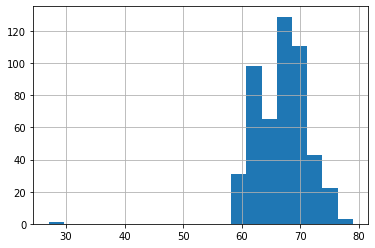

In [14]:
patients["height"].hist(bins=20)

<AxesSubplot:>

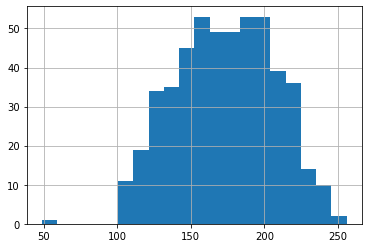

In [15]:
patients["weight"].hist(bins=20)

In [16]:
treatments.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [17]:
treatments.dtypes

given_name       object
surname          object
auralin          object
novodra          object
hba1c_start     float64
hba1c_end       float64
hba1c_change    float64
dtype: object

In [18]:
mask = treatments.duplicated(subset=["given_name", "surname"], keep=False)
treatments[mask]

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
10,joseph,day,29u - 36u,-,7.7,7.19,NaN
136,joseph,day,29u - 36u,-,7.7,7.19,NaN


<AxesSubplot:>

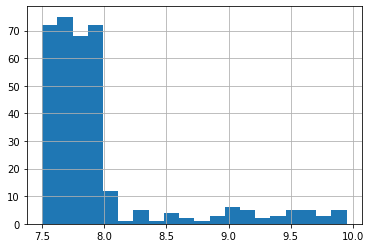

In [19]:
treatments["hba1c_start"].hist(bins=20)

<AxesSubplot:>

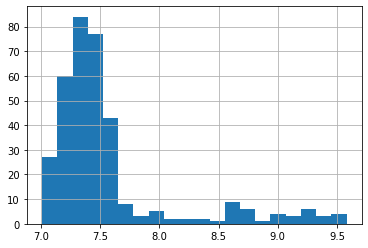

In [20]:
treatments["hba1c_end"].hist(bins=20)

In [21]:
reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [22]:
reactions.isnull().sum()

given_name          0
surname             0
adverse_reaction    0
dtype: int64

In [23]:
reactions.duplicated().sum()

0

`patients` table:
   - `contact` column has two pieces of information
   - phone number has different formats
   - `zip_code` column is float not str
   - some demographic data are missing
   - possible duplication for indexes {24: 29, 97: 502, 131: 282}
   - possible duplication for John Doe
   - `state` column has some appreviations and some long names
   - `weight` and `height` columns have unfamiliar units
   - patient Camilla Zaitseva has unresonable weight value
   - patient Tim Neudorf has unresonable height value
   - some patients have miss calculated `bmi`

`treatments` table:
   - `hba1c_change` column has missing data
   - null values are represented as dashes '-'
   - start dose and end dose are in the same column
   - treatment values 'auralin' and 'novodra' are represented as column names
   - extra 'u' letter attached to the dose value
   - `given_name` and `surname` shown in lower letters
   - duplicated record for joseph day
 
`reactions` table:
   - `given_name` and `surname` shown in lower letters
    


## Clean

In [24]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
reactions_clean = reactions.copy() 

#### Define
   - separate mobile and email into two different columns

#### Code

In [25]:
pattern = r"(\d{10}|\d{3}-\d{3}-\d{4}|\+?1? \(?\d{3}\)? \d{3}[ -]\d{4})"
patients_clean["mobile"] = patients_clean["contact"].str.extract(pattern)
patients_clean["email"] = patients_clean["contact"].str.replace(pattern, "")

#### Test

In [26]:
patients_clean[["contact", "mobile", "email"]].sample(5)

,contact,mobile,email
447,708-691-2195LuizCavalcantiGomes@rhyta.com,708-691-2195,LuizCavalcantiGomes@rhyta.com
259,727-439-7150SaraDMiles@gustr.com,727-439-7150,SaraDMiles@gustr.com
227,402-938-2157LauraEhrlichmann@einrot.com,402-938-2157,LauraEhrlichmann@einrot.com
204,LeixandreAlanisMadrigal@fleckens.hu405-234-5350,405-234-5350,LeixandreAlanisMadrigal@fleckens.hu
473,KateWilkinson@armyspy.com1 508 905 2371,1 508 905 2371,KateWilkinson@armyspy.com


#### Define:
   - convert `zip_code` column to str, and `birthdate` column to datetime

##### Clean:

In [27]:
patients_clean["zip_code"] = patients_clean["zip_code"].astype(str).str[:-2]
patients_clean["birthdate"] = pd.to_datetime(patients_clean["birthdate"])

##### Test:

In [28]:
patients_clean.dtypes

patient_id               int64
assigned_sex            object
given_name              object
surname                 object
address                 object
city                    object
state                   object
zip_code                object
country                 object
contact                 object
birthdate       datetime64[ns]
weight                 float64
height                   int64
bmi                    float64
mobile                  object
email                   object
dtype: object

#### Define:
   - drop rows with indexes 29, 502 and 282
   - drop duplicated names

##### Clean:

In [29]:
patients_clean.drop(index=[29, 502, 282], inplace=True)
patients_clean.drop_duplicates(subset=["given_name", "surname"], inplace=True)

##### Test:

In [30]:
patients_clean.dropna(subset=["contact"]).duplicated(subset=["contact"]).sum()

0

#### Define:
   - convert states long name to short

##### Clean:

In [31]:
long_to_short = {"California": "CA", "New York": "NY", "Illinois": "IL"
                 , "Florida": "FL", "Nebraska": "NE"}
patients_clean["state"].replace(long_to_short, inplace=True)

##### Test:

In [32]:
patients_clean["state"].value_counts()

CA    60
NY    41
TX    32
IL    24
MA    22
FL    22
PA    18
GA    15
OH    14
LA    13
OK    13
MI    13
NJ    12
VA    11
MS    10
WI    10
MN     9
AL     9
IN     9
TN     9
WA     8
NC     8
KY     8
MO     7
KS     6
NV     6
ID     6
CT     5
NE     5
SC     5
IA     5
AZ     4
RI     4
CO     4
ME     4
ND     4
AR     4
SD     3
MD     3
DE     3
OR     3
WV     2
MT     2
VT     2
DC     2
NH     1
AK     1
WY     1
NM     1
Name: state, dtype: int64

#### Define:
   - Convert `weight` to kg from lbs, and `height` from in to m

#### Clean:

In [33]:
patients_clean["weight"] = patients["weight"] * 0.453592
patients_clean["height"] = patients["height"] * 0.0254

##### Test:

In [34]:
patients_clean[["weight", "height"]].describe()

,weight,height
count,495.000000,495.000000
mean,78.657160,1.691024
std,15.470313,0.111953
min,22.135290,0.685800
25%,67.562528,1.600200
50%,79.242522,1.701800
75%,90.559643,1.752600
max,116.074193,2.006600


#### Define:
   - drop rows 4 (wrong height) and 210 (wrong weight)

##### Clean:

In [35]:
patients_clean.drop(index=[4, 210], inplace=True)

##### Test:

In [36]:
mask = (patients_clean["given_name"] == "Camilla") | (patients_clean["given_name"] == "Tim")
patients_clean[mask]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,mobile,email


#### Define:
   - recalculate bmi values

##### Clean:

In [37]:
patients_clean["bmi"] = np.round(patients_clean["weight"] / patients_clean["height"] ** 2, 1)

##### Test:

In [38]:
patients_clean["bmi"].describe()

count    493.000000
mean      27.545030
std        5.280637
min       17.100000
25%       23.300000
50%       27.400000
75%       31.800000
max       37.700000
Name: bmi, dtype: float64

#### Define:
   - recalculate the column `hba1c_change`

##### Clean:

In [43]:
treatments_clean["hba1c_change"] = np.abs(treatments_clean["hba1c_end"] - treatments_clean["hba1c_start"])


##### Test:

In [44]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,0.43
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.47
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,0.43
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


#### Define:
   - create column for treatment and other for dose

##### Clean:

In [48]:
treatments_clean = treatments_clean.melt(id_vars=["given_name", "surname", "hba1c_start", "hba1c_end", "hba1c_change"]
                     , value_vars=["auralin", "novodra"]
                     , var_name="treatment", value_name="dose").replace("-", np.nan).dropna()

##### Test:

In [49]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u


#### Define:
   - Create separate columns for start_dose and end_dose

##### Clean:

In [53]:
new_columns = treatments_clean["dose"].str.extract("(\d+)u - (\d+)u").rename(columns={0: "start_dose", 1: "end_dose"})
treatments_clean = treatments_clean.join(new_columns).drop(columns=["dose"])

##### Test:

In [54]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41,48
3,skye,gormanston,7.97,7.62,0.35,auralin,33,36
6,sophia,haugen,7.65,7.27,0.38,auralin,37,42
7,eddie,archer,7.89,7.55,0.34,auralin,31,38
9,asia,woźniak,7.76,7.37,0.39,auralin,30,36


#### Define:
   - Convert `given_name` and `surname` to title case

##### Clean:

In [55]:
treatments_clean["given_name"] = treatments_clean["given_name"].str.title()
treatments_clean["surname"] = treatments_clean["surname"].str.title()

##### Test:

In [56]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41,48
3,Skye,Gormanston,7.97,7.62,0.35,auralin,33,36
6,Sophia,Haugen,7.65,7.27,0.38,auralin,37,42
7,Eddie,Archer,7.89,7.55,0.34,auralin,31,38
9,Asia,Woźniak,7.76,7.37,0.39,auralin,30,36


#### Define:
   - remove duplicated rows

##### Clean:

In [58]:
treatments_clean.drop_duplicates(inplace=True)

#### Test:

In [59]:
treatments_clean.duplicated().sum()

0

#### Define:
   - Convert `given_name` and `surname` to title case
   - and merge `reactions` table with `treatments`

##### Clean:

In [64]:
reactions_clean["given_name"] = reactions_clean["given_name"].str.title()
reactions_clean["surname"] = reactions_clean["surname"].str.title()
treatments_clean = treatments_clean.merge(reactions_clean, how="left", on=["given_name", "surname"])
treatments_clean["adverse_reaction"].fillna("no-reaction", inplace=True)

##### Test:

In [65]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,start_dose,end_dose,adverse_reaction
0,Veronika,Jindrová,7.63,7.20,0.43,auralin,41,48,no-reaction
1,Skye,Gormanston,7.97,7.62,0.35,auralin,33,36,no-reaction
2,Sophia,Haugen,7.65,7.27,0.38,auralin,37,42,no-reaction
3,Eddie,Archer,7.89,7.55,0.34,auralin,31,38,no-reaction
4,Asia,Woźniak,7.76,7.37,0.39,auralin,30,36,no-reaction
...,...,...,...,...,...,...,...,...,...
344,Christopher,Woodward,7.51,7.06,0.45,novodra,55,51,nausea
345,Maret,Sultygov,7.67,7.30,0.37,novodra,26,23,no-reaction
346,Lixue,Hsueh,9.21,8.80,0.41,novodra,22,23,injection site discomfort
347,Jakob,Jakobsen,7.96,7.51,0.45,novodra,28,26,hypoglycemia


## Visualization

Text(0, 0.5, 'Average hba1c change')

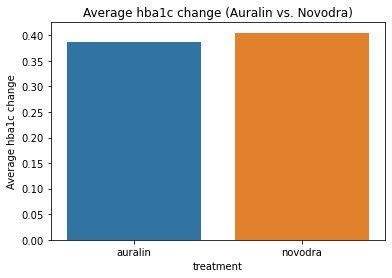

In [68]:
temp = treatments_clean.groupby("treatment")["hba1c_change"].mean()

sns.barplot(x=temp.index, y=temp.values)
plt.title("Average hba1c change (Auralin vs. Novodra)")
plt.ylabel("Average hba1c change")

## Conculsion